In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from util.util import get_root_dir

In [12]:
root_dir = get_root_dir()
proj_dir = root_dir + "/surrogate/plastic_train2/"
df_samples = pd.read_csv(proj_dir + "train2_data/lhs_samples.csv", index_col=0)
df_samples

,Light%,Heavy%
0,0.200000,0.800000
1,0.203015,0.796985
2,0.206030,0.793970
3,0.209045,0.790955
4,0.212060,0.787940
...,...,...
195,0.787940,0.212060
196,0.790955,0.209045
197,0.793970,0.206030
198,0.796985,0.203015


In [13]:
df_outputs = pd.read_csv(proj_dir + "train2_data/result3.csv", header=None)
df_outputs.columns = ["Reflux","Stages","Cond Duty","Reb Duty"]
df_outputs

,Reflux,Stages,Cond Duty,Reb Duty
0,4.099196,25.0,0.078892,0.106804
1,4.053121,25.0,0.079301,0.107188
2,4.008248,25.0,0.079710,0.107569
3,3.964528,25.0,0.080117,0.107950
4,3.921915,25.0,0.080523,0.108329
...,...,...,...,...
195,1.469882,25.0,0.145193,0.167916
196,1.465602,25.0,0.145489,0.168186
197,1.461354,25.0,0.145784,0.168454
198,1.457125,25.0,0.146079,0.168723


In [14]:
def extract_reflux(stage_value):
    # Filter df_samples for specified 'Stages' value and select only "Light%" column
    filtered_data_df = df_samples["Light%"]

    # Convert to numpy array
    filtered_data_np = filtered_data_df.to_numpy().reshape(-1, 1)

    # Initialize an empty list to store the concatenated data
    concatenated_data = []

    # Iterate over the filtered DataFrame
    for idx in filtered_data_df.index:
        # Extract the desired columns (0, 2, 3) from df_outputs
        output_row = df_outputs.loc[idx, df_outputs.columns[[0, 2, 3]]].to_numpy()
        # Concatenate with the row from filtered_data_np
        concatenated_row = np.concatenate((filtered_data_np[filtered_data_df.index.get_loc(idx)].reshape(1, -1), [output_row]), axis=1)
        concatenated_data.append(concatenated_row)

    # Convert the list of arrays into a single numpy array
    arr = np.vstack(concatenated_data)
    arr = arr[np.argsort(arr[:, 1])]
    return arr

s25_data = extract_reflux(25)

In [15]:
print(f"Length of data s50: {len(s25_data)}")

Length of data s50: 200


In [16]:
# Light% , RR, Cond, Reb
s25_data

array([[0.8       , 1.4529196 , 0.14637325, 0.16899046],
       [0.796985  , 1.45712473, 0.14607898, 0.16872271],
       [0.79397   , 1.46135358, 0.14578423, 0.16845447],
       [0.790955  , 1.46560204, 0.14548873, 0.1681855 ],
       [0.78794   , 1.46988223, 0.1451932 , 0.16791649],
       [0.784925  , 1.474186  , 0.14489713, 0.16764695],
       [0.78191   , 1.47851437, 0.14460057, 0.16737691],
       [0.778894  , 1.48286984, 0.14430346, 0.16710634],
       [0.775879  , 1.48724923, 0.14400597, 0.16683538],
       [0.772864  , 1.49165534, 0.14370806, 0.16656401],
       [0.769849  , 1.49608835, 0.14340973, 0.1662922 ],
       [0.766834  , 1.50054854, 0.14311096, 0.16601998],
       [0.763819  , 1.50503667, 0.1428118 , 0.16574735],
       [0.760804  , 1.50955276, 0.14251222, 0.16547431],
       [0.757789  , 1.51409722, 0.14221222, 0.16520085],
       [0.754774  , 1.51867067, 0.14191183, 0.164927  ],
       [0.751759  , 1.5232735 , 0.14161105, 0.16465276],
       [0.748744  , 1.52790577,

## 25 stages is chosen to be the nominal condition

RR:  1.32 - 6.28 (re tested)

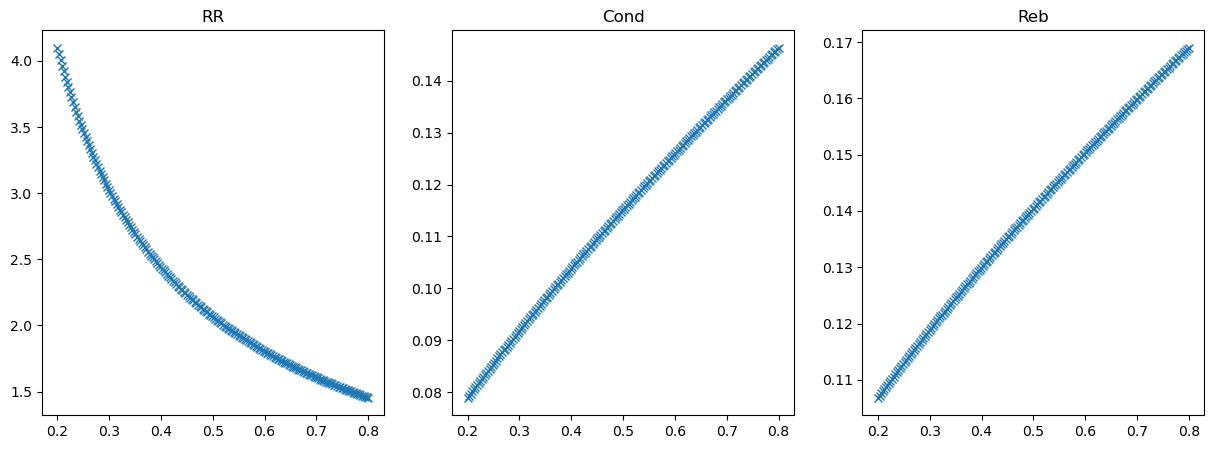

In [17]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
# First plot
axs[0].plot(s25_data.T[0], s25_data.T[1], 'x')
axs[0].set_title('RR')

# Second plot
axs[1].plot(s25_data.T[0], s25_data.T[2], 'x')
axs[1].set_title('Cond')

# Third plot
axs[2].plot(s25_data.T[0], s25_data.T[3], 'x')
axs[2].set_title('Reb')

# Display the plots
plt.show()

In [18]:
coefs1 = np.polyfit(s25_data.T[0], s25_data.T[1], 2)

# Validate
p = np.poly1d(coefs1)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[1]) ** 2)
sst = np.sum((s25_data.T[1] - np.mean(s25_data.T[1])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs1

R^2: 0.9905935773157903


array([  7.39903239, -11.18818779,   5.78878845])

In [19]:
coefs2 = np.polyfit(s25_data.T[0], s25_data.T[2], 1)

# Validate
p = np.poly1d(coefs2)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[2]) ** 2)
sst = np.sum((s25_data.T[2] - np.mean(s25_data.T[2])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs2

R^2: 0.998479936528337


array([0.11165176, 0.0585368 ])

In [20]:
coefs3 = np.polyfit(s25_data.T[0], s25_data.T[3], 1)

# Validate
p = np.poly1d(coefs3)
RR_pred = p(s25_data.T[0])

# Calculate SSR and SST
ssr = np.sum((RR_pred - s25_data.T[3]) ** 2)
sst = np.sum((s25_data.T[3] - np.mean(s25_data.T[3])) ** 2)

# Calculate R^2
r_squared = 1 - (ssr / sst)

print("R^2:", r_squared)

coefs3

R^2: 0.9982131768830725


array([0.10282521, 0.08821265])